<a href="https://colab.research.google.com/github/arjunk-15/Data_Science/blob/main/GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


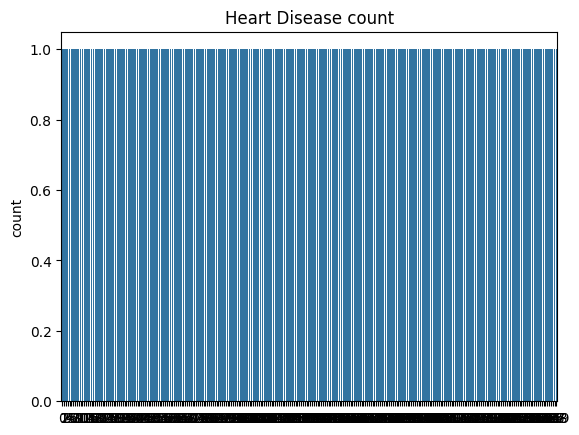

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/heart_v2.csv')
print(df.head())
sns.countplot(df['heart disease'])
plt.title('Heart Disease count')
plt.show()

In [35]:
x = df.drop('heart disease',axis=1)
y = df['heart disease']
print(x.head())
print(y.head())

   age  sex   BP  cholestrol
0   70    1  130         322
1   67    0  115         564
2   57    1  124         261
3   64    1  128         263
4   74    0  120         269
0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((216, 4), (54, 4), (216,), (54,))

In [28]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

classification_rf = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=5,oob_score=True)
classification_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [30]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10,20]
}

model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]})

In [31]:
print("Best Cv Score:", grid_search.best_score_)

Best Cv Score: 0.013925507733007669


In [32]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor()

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


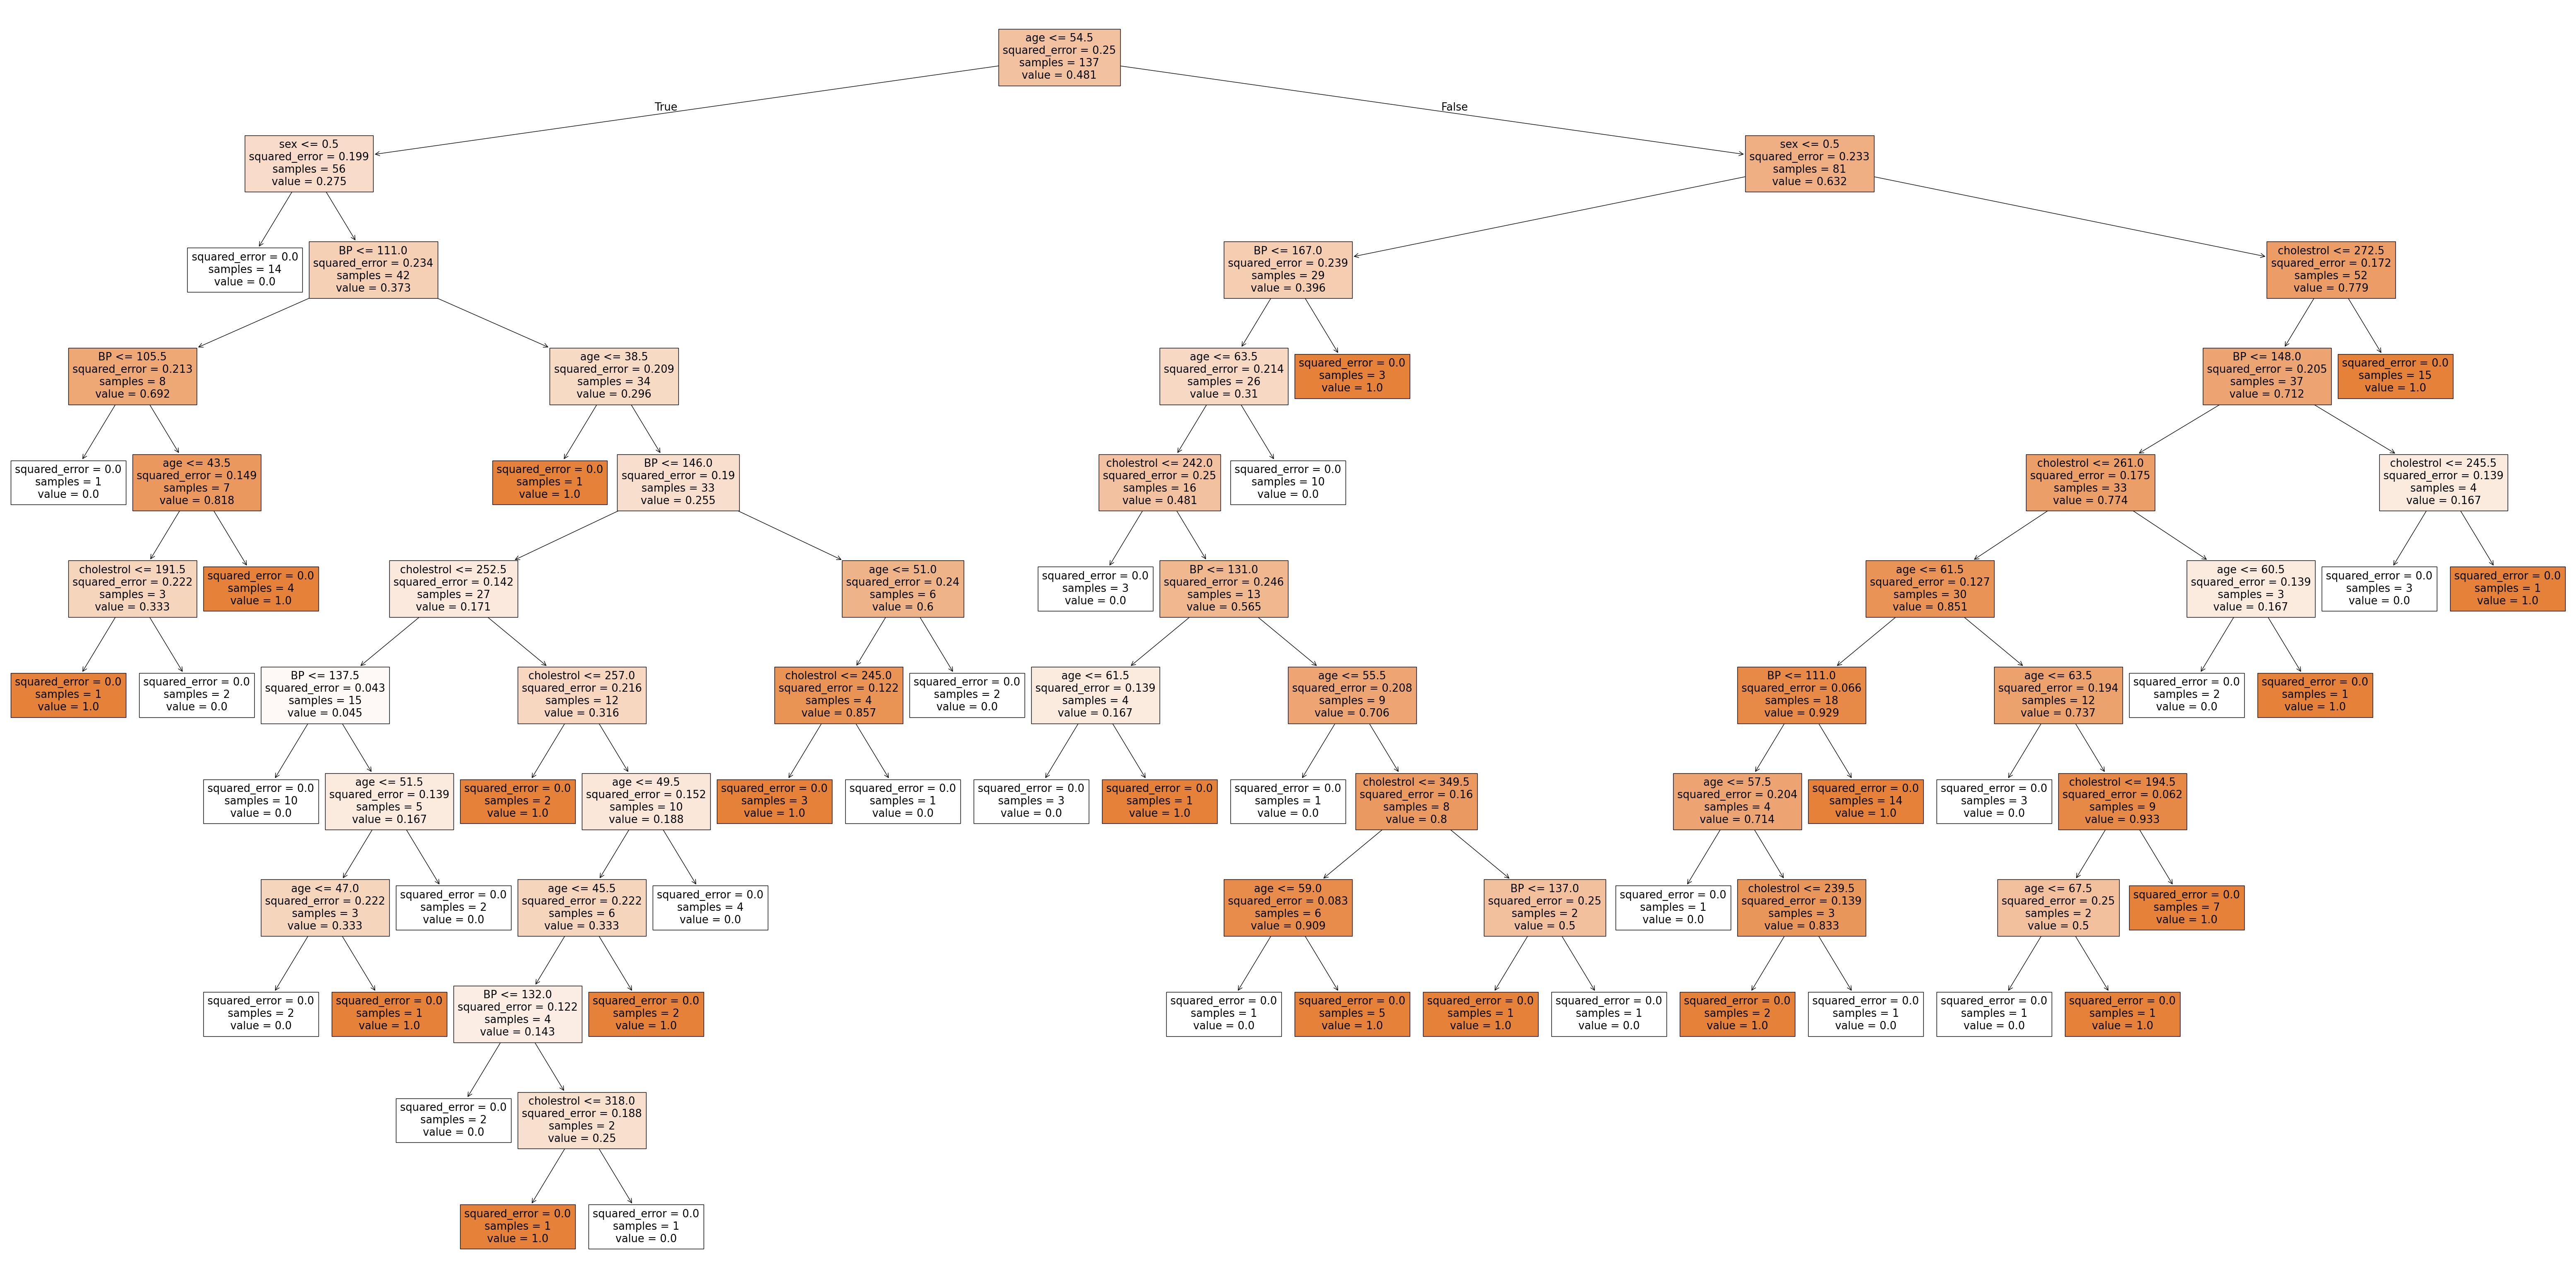

In [37]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names=x.columns,class_names=['Disease','No Disease'],filled = True)
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

In [40]:
rf=RandomForestClassifier(random_state=42)

In [41]:
random_param_grid = {
    'n_estimators': np.arange(50, 201, 10),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2, 4]
}

In [42]:
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=random_param_grid,
                                   n_iter=20,
                                   cv=3,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

In [45]:
random_search.fit(x_train, y_train)
print("Best parameters (Random Search):", random_search.best_params_)
print("Validation Score:", random_search.best_score_)

y_pred_random = random_search.predict(x_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print("Test Accuracy (Random Search):", accuracy_random)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters (Random Search): {'n_estimators': np.int64(110), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': np.int64(5)}
Validation Score: 0.6527777777777778
Test Accuracy (Random Search): 0.6481481481481481
